<a href="https://colab.research.google.com/github/Xuan-He-97/Neural-networks-and-quantum-field-theory/blob/main/Notes_Why_does_deep_and_cheap_learning_work_so_well.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep learning algorithm has seen significant success since the past decades. However, what did the neural network does during the training process is obscure to human. The complexity of its structure makes deep learning hard to be intepreted. One thing interesting to us is that, despite of large number of possible functions, why can a neural network approximate the funciton so well with relatively much fewer parameters than the dimensions and size of its input data?

This [paper](https://arxiv.org/abs/1608.08225) manages to develop some physical insights on deep learning and its success. Here, we illustrate several inspiring ideas from it.

## Neural Network is trying to approximate the Hamiltonian of the data.

$$
\begin{aligned}
H_{y}(\mathrm{x}) & \equiv-\ln p(\mathrm{x} \mid y), \\
\mu_{y} & \equiv-\ln p(y) .
\end{aligned}
$$

The Hamiltonian gives Maxwell-Boltzman distribution of $\mathrm{x}$ given $y$. Combining with Bayes rule, the distribution of $y$ given $\mathrm{x}$ is 
$$
p(y \mid \mathbf{x})=\frac{1}{N(\mathbf{x})} e^{-\left[H_{y}(\mathbf{x})+\mu_{x}\right]}
$$
where, 
$$
N(\mathrm{x}) \equiv \sum_{y} e^{-\left[H_{y}(\mathbf{x})+\mu_{y}\right]}
$$

If the last layer is softmax layer,
$$
\tilde{\sigma}(\mathrm{x}) \equiv \frac{e^{\mathrm{x}}}{\sum_{i} e^{y_{i}}}
$$
then the layer before it computes the Hamiltonian vector $\mathbf{H}(\mathbf{x}). $ The $\mu$ -vector simply becomes the bias term in the final layer.

The Hamiltonian that a neural network approximates is simple, specifically, polynomial. Let's expand a Hamiltonian as a power series,
$$
H_{y}(\mathrm{x})=h+\sum_{i} h_{i} x_{i}+\sum_{i \leq j} h_{i j} x_{i} x_{j}+\sum_{i \leq j \leq k} h_{i j k} x_{i} x_{j} x_{k}+\cdots
$$

### Multiplication Gate



#### Continuous input

Taylor expand the activation around the origin (if the inputs are large, we could make them small by scaling):
$$
\sigma(u)=\sigma_{0}+\sigma_{1} u+\sigma_{2} \frac{u^{2}}{2}+\mathcal{O}\left(u^{3}\right)
$$

Then we can approximate the multiplication,

$$
m(u, v) \equiv \frac{\sigma(u+v)+\sigma(-u-v)-\sigma(u-v)-\sigma(-u+v)}{a_{\sigma}}
$$

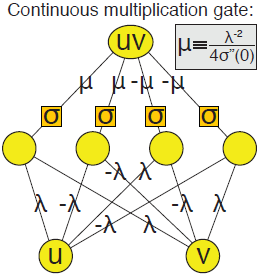

#### Binary input

The non-trival terms are that all variables have at most the first order.

$$
H_{y}(\mathrm{x})=h+\sum_{i} h_{i} x_{i}+\sum_{i \leq j} h_{i j} x_{i} x_{j}+\sum_{i \leq j \leq k} h_{i j k} x_{i} x_{j} x_{k}+\cdots
$$

The Hamiltonian is a finite series with $2^n$ terms. 

The multiplication approximator could be constructed as:

$$
\prod_{i \in K} x_{i}=\lim _{\beta \rightarrow \infty} \sigma\left[-\beta\left(k-\frac{1}{2}-\sum_{x \in K} x_{i}\right)\right]
$$



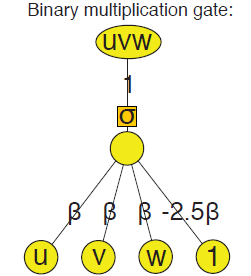

### Neural network is able to approximate polynomials

**Corollary:**  For any given multivariate polynomial and any tolerance $\epsilon>0$, there exists a neural network of fixed finite size $N$ (independent of $\epsilon)$ that approximates the polynomial to accuracy better than $\epsilon$. Furthermore, $N$ is bounded by the complexity of the polynomial, scaling as the number of multiplications required times a factor that is typically slightly larger than $4 .$

### Hamiltonian

What will the Hamiltonian be in most situation?

- Low polynomial order

- Local

- Symmetry

## Deep neural network is more efficient

### Data generated by hierarchical process

$\mathbf{p}_{n}=\mathbf{M}_{n} \mathbf{M}_{n-1} \cdots \mathbf{M}_{1} \mathbf{p}_{0}$

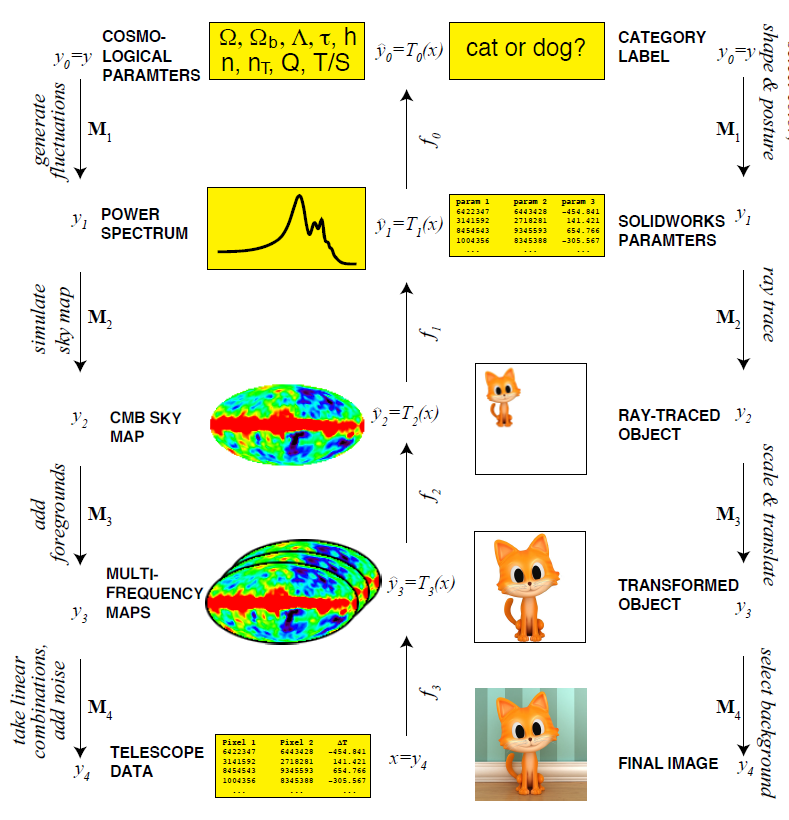

### Deep learning aims to reverse the hierarchical process

Deep learning inferences the input $y$ from the output $x$.

- **Sufficient statistics**: $T(x)$ is all the information about $y$ contained in $x$.

The data processing inequality $[30]$ states that for any function $f$ and any random variables $x, y$,
$$
I(x, y) \geq I(x, f(y))
$$
where $I$ is the mutual information:
$$
I(x, y)=\sum_{x, y} p(x, y) \log \frac{p(x, y)}{p(x) p(y)}
$$
A sufficient statistic $T(x)$ is a function $f(x)$ for which " $\geq$ " gets replaced by "=", i.e., a function retaining all the information about $y$.

- **Minimal sufficient statistic**: sufficient statistic of all other sufficient statistic. $T_{*}(y) = f(T(y))$

- **Theorem**: Given a Markov chain described by our notation above, let $T_{i}$ be a minimal sufficient statistic of $P\left(y_{i} \mid y_{n}\right)$. Then there exists some functions $f_{i}$ such that $T_{i}=f_{i} \circ T_{i+1}$. More casually speaking, the generative hierarchy of Figure 3 can be optimally reversed one step at a time: there are functions $f_{i}$ that optimally undo each of the steps, distilling out all information about the level above that was not destroyed by the Markov process. 

- **Corollary**: Define the function $f_{0}\left(T_{0}\right)=P\left(y_{0} \mid T_{0}\right)$ and $f_{n}=T_{n-1}$. Then
$$
P\left(y_{0} \mid y_{n}\right)=\left(f_{0} \circ f_{1} \circ \cdots \circ f_{n}\right)\left(y_{n}\right)
$$

### Distillation could be near sufficient

If not being strict sufficient could reduce complexity of the Hamiltonian to a great extent, this procedure called renormalization is a useful method to approximate distillation.

**The working definition** of RG consists of a vector $y$ of random variables, a course-graining operation $R$ and a requirement that this operation leaves Hamiltonian invariant except for parameter changes.

$$
H_y(x) \rightarrow H'(R(x)) = H_{r(y)}(R^n(x))
$$

- Renormalization flow: $R^n = R \circ R \circ \cdots R$

- Renormalization is a supervised learning

#### Example of renormalization:

The Hamiltonian of a **simple image model** is: 

$$
H_{y}(\phi)=\int\left[y_{0} \phi^{2}+y_{1}(\nabla \phi)^{2}+y_{2}\left(\nabla^{2} \phi\right)^{2}+\cdots\right] d^{2} r
$$

$\phi(\mathbf{r})$ describes the image by intensity field. In neural network, the derivatives are approximated by differences. The translational symmetry of the image implies a convnet. Thus the course graining operation is replacing each block of $b \times b$ pixels by its average and dividing the result by $b^{2}$, the Hamiltonian retains the form of previous equation but with the parameters $y_{i}$ replaced by
$$
y_{i}^{\prime}=b^{2-2 i} y_{i}
$$

This means that all parameters $y_{i}$ with $i \geq 2$ decay exponentially with $b$ as we repeatedly renormalize and $b$ keeps increasing, so that for modest $b$, one can neglect all but the first few $y_{i}$ 's. The neural network now becomes finite if we only consider relevant operators and ignore irrelavant ones.

In renormalization, we care about the large-scale properties of the data.

### Cost of Flattening

- Flattening cost 

$\mathbf{f}_{\mathrm{c}}^{l}$ is a **neuron-efficient flattening** if:

$$
\begin{aligned}
C_{n}(\mathbf{f}, \ell, \epsilon) & \equiv \min _{\mathbf{f}_{\mathrm{c}}^{l}} \frac{N_{n}\left(\mathbf{f}_{\epsilon}^{\ell}\right)}{N_{n}(\mathbf{f})}
\end{aligned} < 1
$$ 

where $\mathbf{f}$ is the original deep neural network.

$\mathbf{f}_{\mathrm{c}}^{l}$ is a **synapse-efficient flattening** if:

$$
\begin{aligned}
C_{s}(\mathbf{f}, \ell, \epsilon) & \equiv \min _{\mathbf{f}_{c}^{\ell}} \frac{N_{s}\left(\mathbf{f}_{\epsilon}^{\ell}\right)}{N_{s}(\mathbf{f})}
\end{aligned} < 1
$$


### No-flattening theorem for linear models

Neuron efficiency satisfies.

- factorization of matrix

fully flattening a network that performs a FFT of $n$ variables increases the synapse count $N_s$ from $\mathcal{O}(nlogn)$ to $\mathcal{n}$.

- matrix multiplication 

from $\mathcal{O}(n^3)$ to $\mathcal{O}(n^{2.3728639})$

- low rank matrix multiplication

$\mathbf{A}$  is a rank $k$ $\,n \times n$ matrix. 
$\mathbf{A} = \mathbf{B}\mathbf{C}$ where $\mathbf{B}$ is $n \times k$ and $\mathbf{C}$ is $k \times n$.
Thus $C_s = n / 2k$

- sparse matrix
>Finally, let us consider flattening a network $\mathrm{f}=\mathrm{AB}$, where $\mathrm{A}$ and $\mathrm{B}$ are random sparse $n \times n$ matrices such that each element is 1 with probability $p$ and 0 with probability $1-p$. Flattening the network results in a matrix $F_{i j}=\sum_{k} A_{i k} B_{k j}$, so the probability that $F_{i j}=0$ is $\left(1-p^{2}\right)^{n} .$ Hence the number of non-zero components will on average be $\left(1-\left(1-p^{2}\right)^{n}\right) n^{2}$, so
$$
C_{s}=\frac{\left[1-\left(1-p^{2}\right)^{n}\right] n^{2}}{2 n^{2} p}=\frac{1-\left(1-p^{2}\right)^{n}}{2 p}
$$
Note that $C_{s} \leq 1 / 2 p$ and that this bound is asymptotically saturated for $n \gg 1 / p^{2}$. Hence in the limit where $n$ is very large, flattening multiplication by sparse matrices $p \ll 1$ is horribly inefficient.

### No-flattening theorem for polynomial model

Multiplication of $n$ variables can be implemented by a flat network with $2^{n}$ neurons in the hidden layer.

$$
\prod_{i=1}^{n} x_{i}=\frac{1}{2^{n}} \sum_{\{s\}} s_{1} \ldots s_{n} \sigma\left(s_{1} x_{1}+\ldots+s_{n} x_{n}\right)
$$

which is necessary and sufficient.

Therefore, polynomials are exponentially expensive to flatten. $\mathcal{O}(4n) \rightarrow \mathcal{O}(2^n)$